In [26]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
data=pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Моудль 4/Задание 7/Model_precision/adult.csv")

In [3]:
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [5]:
#Дропнем категориальные фичи
data_fix=data.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'], axis=1)
#Заменим признаки gender, income на числовые
data_fix['gender']=data_fix['gender'].map({'Male': 1, 'Female': 0})
data_fix['income']=data_fix['income'].map({'<=50K': 0, '>50K': 1})

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(data_fix.drop('income', axis=1), data_fix['income'], test_size = 0.3, random_state = 0)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score:
0.7986077936258786
AUC:


0.8425825036839014

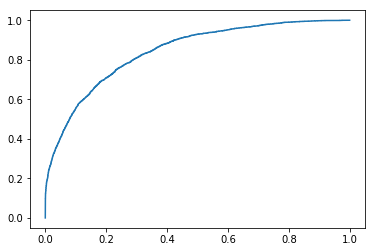

In [66]:
#Логистическая регрессия

from sklearn.linear_model import LogisticRegression

model_lr1 = LogisticRegression(penalty = 'l1', C = 0.01)
model_lr1.fit(X_train,Y_train)

Y_pred_lr1 = model_lr1.predict_proba(X_test)
print('score:')
print(model_lr.score(X_test, Y_test))

# получаем значения false и true positive rate для различных значений порога
fpr_lr1, tpr_lr1, thres_lr1 = roc_curve( Y_test, Y_pred_lr1[:, 1] )

plt.plot( fpr_lr1, tpr_lr1 )
print('AUC:')
auc( fpr_lr1, tpr_lr1 )

score:
0.7986077936258786
AUC:


C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5794302028067894

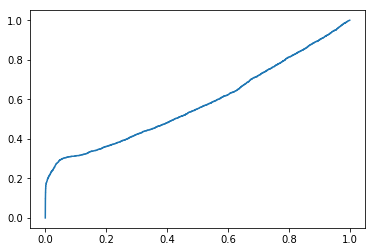

In [67]:
#Логистическая регрессия

from sklearn.linear_model import LogisticRegression

model_lr2 = LogisticRegression(penalty = 'l2', C = 0.01)
model_lr2.fit(X_train,Y_train)

Y_pred_lr2 = model_lr2.predict_proba(X_test)
print('score:')
print(model_lr2.score(X_test, Y_test))

# получаем значения false и true positive rate для различных значений порога
fpr_lr2, tpr_lr2, thres_lr2 = roc_curve( Y_test, Y_pred_lr2[:, 1] )

plt.plot( fpr_lr2, tpr_lr2 )
print('AUC:')
auc( fpr_lr2, tpr_lr2 )

score:
0.7986077936258786
AUC:


C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5794304837769128

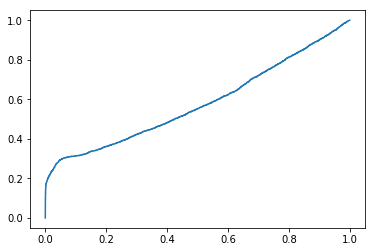

In [68]:
#Логистическая регрессия

from sklearn.linear_model import LogisticRegression

model_lr3 = LogisticRegression(penalty = 'l2', C = 1)
model_lr3.fit(X_train,Y_train)

Y_pred_lr3 = model_lr3.predict_proba(X_test)
print('score:')
print(model_lr3.score(X_test, Y_test))

# получаем значения false и true positive rate для различных значений порога
fpr_lr3, tpr_lr3, thres_lr3 = roc_curve( Y_test, Y_pred_lr3[:, 1] )

plt.plot( fpr_lr3, tpr_lr3 )
print('AUC:')
auc( fpr_lr3, tpr_lr3 )

score:
0.2422544928915431
AUC:


0.8305612480386371

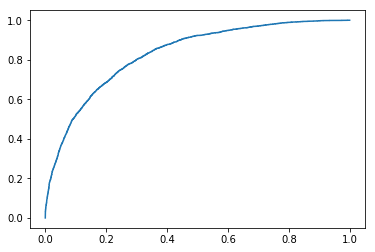

In [69]:
#Линейная регрессия

from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train,Y_train)

Y_pred_lin = model_lin.predict(X_test)
print('score:')
print(model_lin.score(X_test, Y_test))

# получаем значения false и true positive rate для различных значений порога
fpr_lin, tpr_lin, thres_lin = roc_curve( Y_test, Y_pred_lin )

plt.plot( fpr_lin, tpr_lin )
print('AUC:')
auc( fpr_lin, tpr_lin )

score:
-0.18247855907054844
AUC:


0.8305612480386371

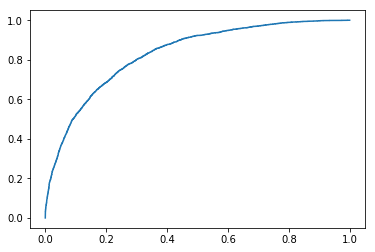

In [76]:
#Линейная регрессия

from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train,Y_train)

Y_pred_tree = model_tree.predict(X_test)
print('score:')
print(model_tree.score(X_test, Y_test))

# получаем значения false и true positive rate для различных значений порога
fpr_tree, tpr_tree, thres_tree = roc_curve( Y_test, Y_pred_lin )

plt.plot( fpr_tree, tpr_tree )
print('AUC:')
auc( fpr_tree, tpr_tree )

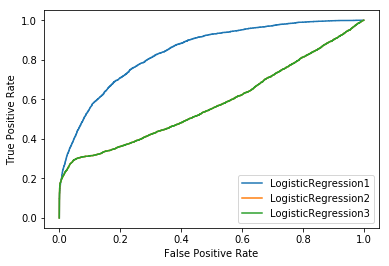

In [78]:
plt.plot( fpr_lr1, tpr_lr1, label = 'LogisticRegression1' )
plt.plot( fpr_lr2, tpr_lr2, label = 'LogisticRegression2' )
plt.plot( fpr_lr3, tpr_lr3, label = 'LogisticRegression3' )


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

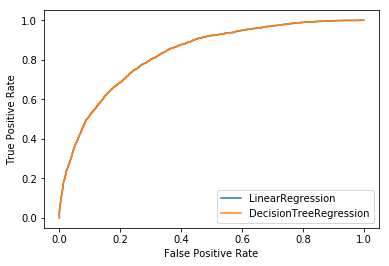

In [79]:
plt.plot( fpr_lin, tpr_lin, label = 'LinearRegression' )
plt.plot( fpr_tree, tpr_tree, label = 'DecisionTreeRegression' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()